<a href="https://colab.research.google.com/github/Lameeselbakr55/NTI_AI_Projects/blob/master/MNIST/ANN_to_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANN to MNIST Dataset

##Dataloading and preparation

In [ ]:
from tensorflow import keras
from keras.layers import Input, Dense, Dropout,Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import  datasets
from matplotlib import pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

##Model Fitting

In [ ]:
model=keras.Sequential() #Create a network sequence.

model.add(Input(shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(120,activation = 'tanh'))
model.add(Dense(84,activation = 'tanh'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 120)               94200     
                                                                 
 dense_1 (Dense)             (None, 84)                10164     
                                                                 
 dense_2 (Dense)             (None, 10)                850       
                                                                 
Total params: 105,214
Trainable params: 105,214
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy'])
model.compile(optimizer='Adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])
results= model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test, y_test))



Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0549 - accuracy: 0.9832 - val_loss: 0.0869 - val_accuracy: 0.9728
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0406 - accuracy: 0.9885 - val_loss: 0.0755 - val_accuracy: 0.9772
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0308 - accuracy: 0.9910 - val_loss: 0.0738 - val_accuracy: 0.9767
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0251 - accuracy: 0.9928 - val_loss: 0.0811 - val_accuracy: 0.9756
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0193 - accuracy: 0.9948 - val_loss: 0.0760 - val_accuracy: 0.9771
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0163 - accuracy: 0.9956 - val_loss: 0.0764 - val_accuracy: 0.9789
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0123 - accuracy: 0.9969 - val_loss: 0.0803 - val_accuracy: 0.9776
Epoch 

##Results

In [ ]:
score = model.evaluate(x_train, y_train)


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0045 - accuracy: 0.9993


In [ ]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0831 - accuracy: 0.9778


In [ ]:
y_pred=model.predict(x_test)
y_pred.shape

(10000, 10)

In [ ]:
import numpy as np
from numpy import argmax
y_pred1=argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score,  confusion_matrix
print(confusion_matrix(y_test,y_pred1))

accuracy_score(y_test,y_pred1)*100

[[ 966    1    4    1    1    2    1    1    2    1]
 [   0 1127    2    1    0    1    1    1    2    0]
 [   2    2 1014    2    1    0    1    6    4    0]
 [   0    1    8  990    0    2    0    5    3    1]
 [   0    0    1    1  965    0    4    3    0    8]
 [   2    1    0   19    2  857    3    1    6    1]
 [   5    3    5    1    5    2  935    0    2    0]
 [   1    6   12    1    2    0    0  997    4    5]
 [   0    1    6    5    4    3    1    6  945    3]
 [   2    2    1    6    9    1    0    5    1  982]]


97.78

[6.3163831e-08 1.3129302e-09 7.3449514e-06 3.8083585e-05 1.8043092e-10
 2.3960058e-07 7.3539211e-14 9.9995387e-01 3.3376590e-09 4.2000548e-07]
7


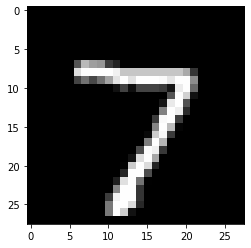

In [ ]:
plt.imshow(x_test[0],cmap="gray")
print(y_pred[0])
print(y_pred1[0])

In [ ]:
model.save('mnist.h5')

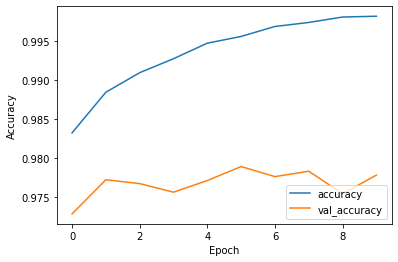

In [ ]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')